# Instalar dependendias

In [3]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

# Instalar Theano

In [4]:
!pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

Defaulting to user installation because normal site-packages is not writeable

  Running command git clone --filter=blob:none --quiet git://github.com/Theano/Theano.git 'C:\Users\jose.lozas\AppData\Local\Temp\pip-req-build-w1c6x1iz'
  fatal: unable to connect to github.com:
  github.com[0: 140.82.112.4]: errno=Unknown error

  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet git://github.com/Theano/Theano.git 'C:\Users\jose.lozas\AppData\Local\Temp\pip-req-build-w1c6x1iz' did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet git://github.com/Theano/Theano.git 'C:\Users\jose.lozas\AppData\Local\Temp\pip-req-build-w1c6x1iz' did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.



  Cloning git://github.com/Theano/Theano.git to c:\users\jose.lozas\appdata\local\temp\pip-req-build-w1c6x1iz


# Instalar Tensorflow y Keras


In [5]:
!pip install keras
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached tensorflow_intel-2.14.0-cp39-cp39-win_amd64.whl (284.1 MB)
  Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
  Using cached tensorboard-2.14.1-py3-none-any.whl (5.5 MB)
  Using cached tensorflow_estimator-2.14.0-py2.py3-none-any.whl (440 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1


# SOM


# Cómo importar las librerías


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parte 1 - Identificar los fraudes potenciales con un SOM


# Importar el data set


In [8]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Escalado de características

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Entrenar el SOM

In [10]:
import sys
sys.path.append('/content/deeplearning-az/datasets/Part 4 - Self Organizing Maps (SOM)')
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizar los resultados


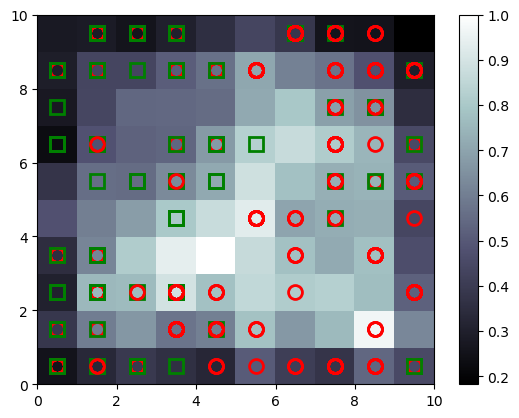

In [11]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5,
         markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', 
         markersize = 10, markeredgewidth = 2)
show()

# Encontrar los fraudes

In [12]:
mappings = som.win_map(X)
frauds = np.concatenate( (mappings[(3,1)], mappings[(2,5)]), axis = 0 )
frauds = sc.inverse_transform(frauds)

# Parte 2 - Trasladar el modelo de Deep Learning de no supervisado a supervisado


# Crear la matriz de características


In [13]:
customers = dataset.iloc[:, 1:-1].values

# Crear la variable dependiente

In [14]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

# Escalado de variables


In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
customers = sc_X.fit_transform(customers)

# Parte 2 - Construir la RNA


# Importar Keras y librerías adicionales


In [16]:
from keras.models import Sequential
from keras.layers import Dense

# Inicializar la RNA


In [17]:
classifier = Sequential()

# Añadir las capas de entrada y primera capa oculta


In [18]:
classifier.add(Dense(units = 2, kernel_initializer = "uniform",  activation = "relu", input_dim = 14))

# Añadir la capa de salida


In [19]:
classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))

# Compilar la RNA

In [20]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# Ajustamos la RNA al Conjunto de Entrenamiento


In [21]:
classifier.fit(customers, is_fraud,  batch_size = 1, epochs = 2)


Epoch 1/2
690/690 [==============================] - 2s 1ms/step - loss: 0.4733 - accuracy: 0.9667
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.1889 - accuracy: 0.9667


# Predicción de los resultados de fraude

In [22]:
y_pred  = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:,1].argsort()]

22/22 [==============================] - 0s 1ms/step
